In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [ ]:
df=pd.read_csv('water_potability.csv')

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df.shape

(3276, 10)

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
X=df.drop("Potability",axis=1)
headers = X.columns
y=df["Potability"]

X.shape, y.shape

((3276, 9), (3276,))

In [ ]:
headers

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns=headers)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42, stratify=df["Potability"], shuffle=True)

# EXPT 1



In [ ]:
import pandas as pd
import statistics

# Read the CSV file into a DataFrame
df = pd.read_csv('water_potability.csv')

# Print the column names
print("Column names:", X.columns)

# Specify the column for analysis
Hardness = 'Hardness'

# Check if the specified column exists in the DataFrame
if Hardness in X.columns:
    # Extract the data from the specified column
    Hardness = df[Hardness].tolist()

    # Calculate mean
    mean_price = statistics.mean(Hardness)

    # Calculate mode
    try:
        mode_price = statistics.mode(Hardness)
    except statistics.StatisticsError:
        mode_price = None  # In case there's no mode

    # Calculate median
    median_price = statistics.median(Hardness)

    # Print the results
    print(f"Mean: {mean_price}")
    print(f"Mode: {mode_price}")
    print(f"Median: {median_price}")
else:
    print(f"Column '{Hardness}' not found in the DataFrame.")

Column names: Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')
Mean: 196.36949601730154
Mode: 204.8904554713363
Median: 196.96762686363076


In [ ]:
import pandas as pd
import statistics

# Read the CSV file into a DataFrame
df = pd.read_csv('water_potability.csv')

# Print the column names
print("Column names:", X.columns)

# Specify the column for analysis
Hardness = 'Hardness'

# Check if the specified column exists in the DataFrame
if Hardness in X.columns:
    # Extract the data from the specified column
    Hardness = df[Hardness].tolist()

    # Calculate range
    data_range = max(Hardness) - min(Hardness)

    # Calculate quartiles
    q1 = statistics.quantiles(Hardness, n=4)[0]
    q2 = statistics.median(Hardness)
    q3 = statistics.quantiles(Hardness, n=4)[2]

    # Calculate absolute deviation
    abs_deviation = [abs(price - statistics.median(Hardness)) for price in Hardness]

    # Calculate variance
    variance = statistics.variance(Hardness)

    # Calculate standard deviation
    std_deviation = statistics.stdev(Hardness)

    # Print the results
    print(f"Range: {data_range}")
    print(f"Q1: {q1}")
    print(f"Q2 (Median): {q2}")
    print(f"Q3: {q3}")
    print(f"Absolute Deviation: {abs_deviation}")
    print(f"Variance: {variance}")
    print(f"Standard Deviation: {std_deviation}")
else:
    print(f"Column '{Hardness}' not found in the DataFrame.")


Column names: Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')
Range: 275.692
Q1: 176.84422096095204
Q2 (Median): 196.96762686363076
Q3: 216.67173148721835
Absolute Deviation: [7.922828607705554, 67.5447063486865, 27.268632529927004, 17.405767221991738, 15.866117627505503, 8.654303094014352, 51.10410840650917, 6.393895720939753, 77.97904777337888, 30.263842374343795, 31.446829604102135, 21.725673625035682, 40.262633523238605, 46.79270346849455, 8.377355294554405, 10.234746203054641, 14.081779196914994, 76.84617979617019, 82.38953990646166, 17.528983593525794, 30.467421487525257, 28.683880007112435, 19.010231824437, 0.0643801553099479, 56.22856461249117, 1.7997243958253364, 10.958633324363007, 51.19944626145818, 69.45339120448665, 48.814565418544134, 12.657973672659693, 6.211008576626455, 79.17639731323378, 38.07690762374031, 35.31282515990134, 5.014883888771919, 13.05890460180384

In [ ]:
import pandas as pd
import statistics
from scipy.stats import skew

# Read the CSV file into a DataFrame
df = pd.read_csv('water_potability.csv')

# Print the column names
print("Column names:", X.columns)

# Specify the column for analysis
Hardness = 'Hardness'

# Check if the specified column exists in the DataFrame
if Hardness in X.columns:
    # Extract the data from the specified column
    Hardness = df[Hardness].tolist()

    # Calculate skewness
    skewness = skew(Hardness)

    # Print the results
    print(f"Skewness: {skewness}")
else:
    print(f"Column '{Hardness}' not found in the DataFrame.")

Column names: Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')
Skewness: -0.0393236888840398


#EXPT 2 (Data Visualiation)

In [ ]:
X = df.drop("Potability",axis = 1)
y = df.Potability

print(X)
print(y)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013       

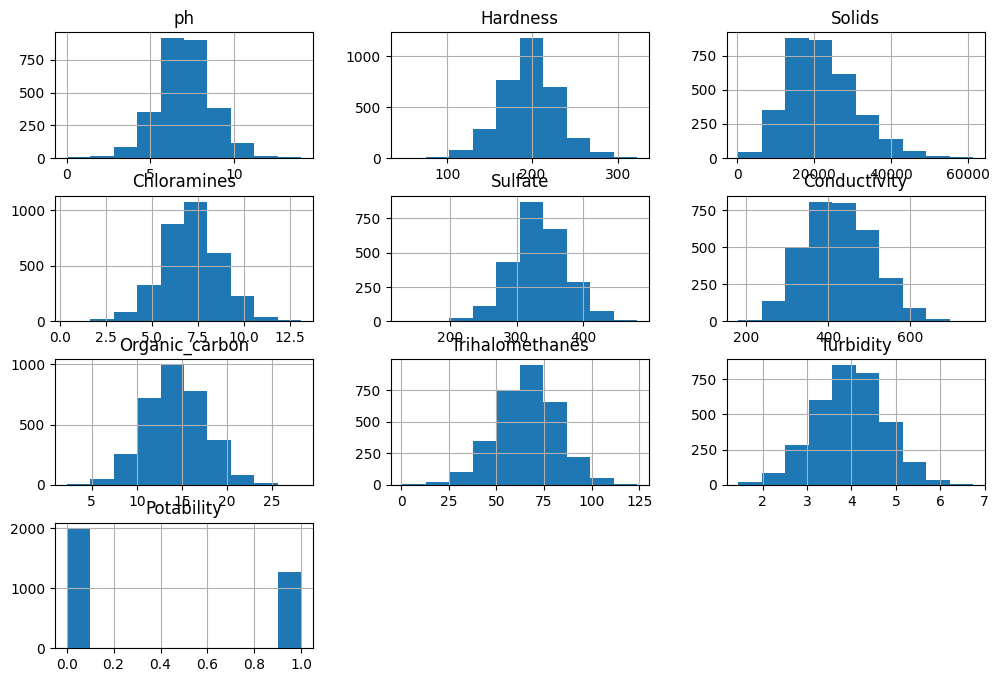

In [ ]:
df.hist(figsize=(12,8))
plt.show()

<Axes: xlabel='Hardness', ylabel='Count'>

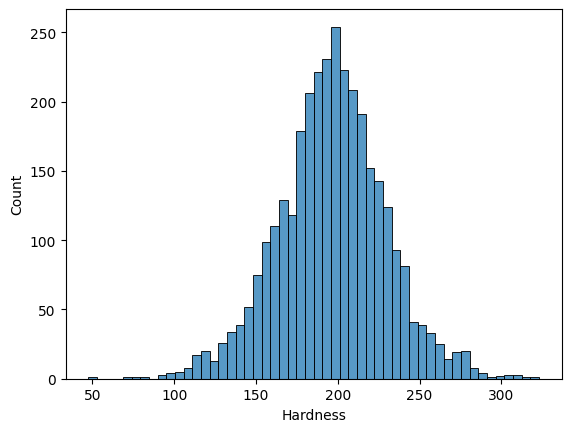

In [ ]:
sns.histplot(x = "Hardness", data=df)

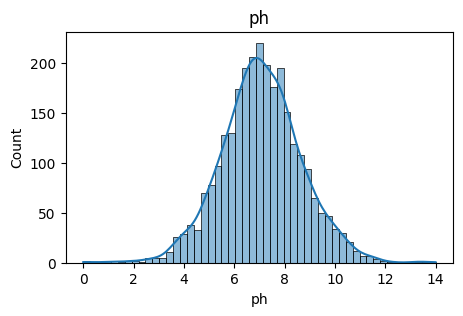

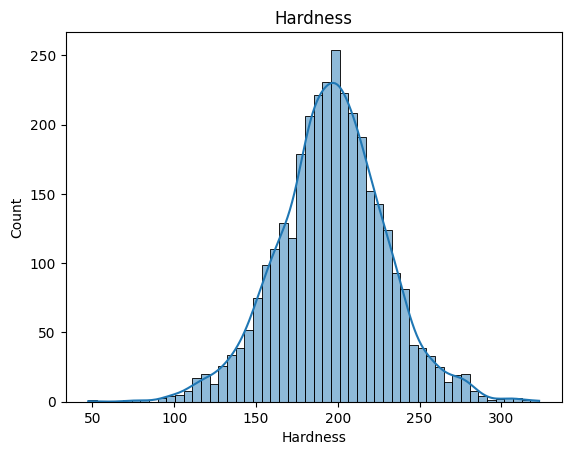

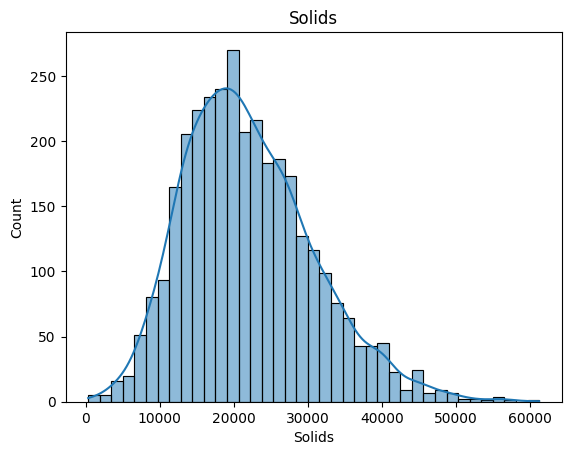

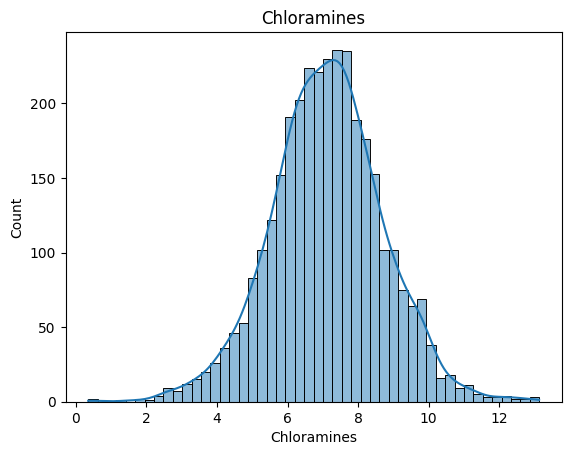

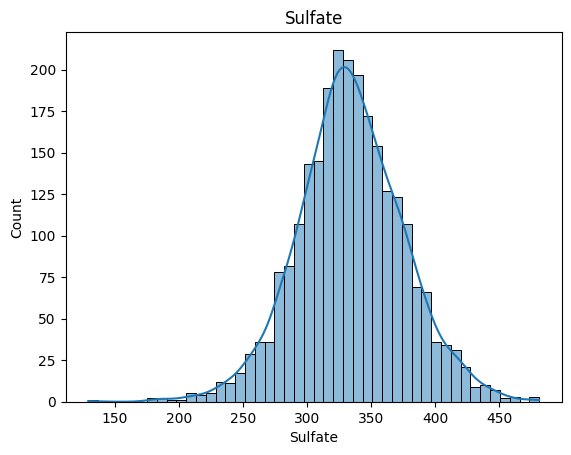

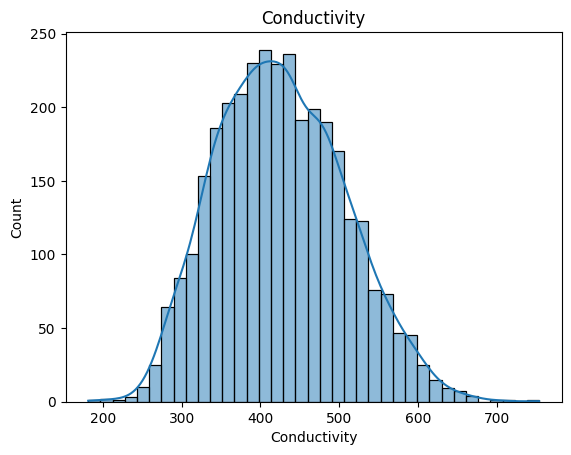

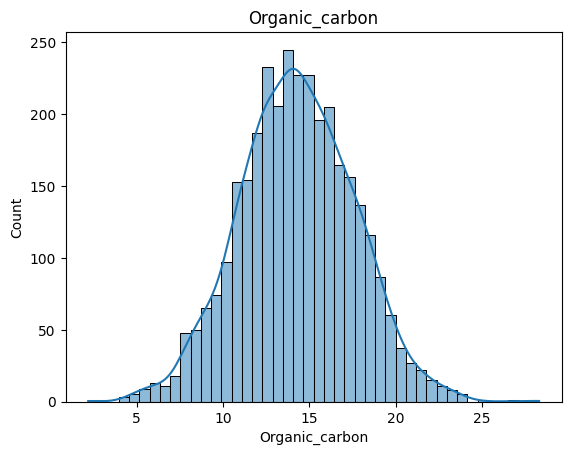

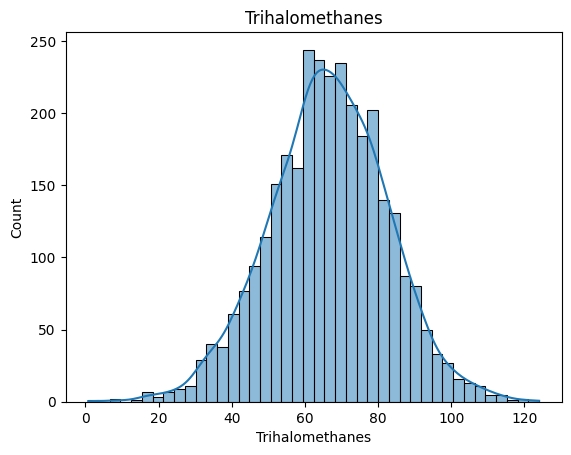

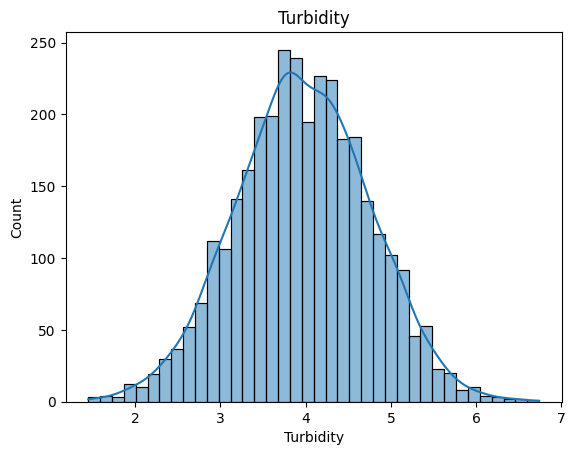

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
for col in X.columns:
    sns.histplot(data=df, x=col, kde = True)
    plt.title(f"{col}")
    plt.show()

<ipython-input-23-844bd2d003c4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sulfate'])


<Axes: xlabel='Sulfate', ylabel='Density'>

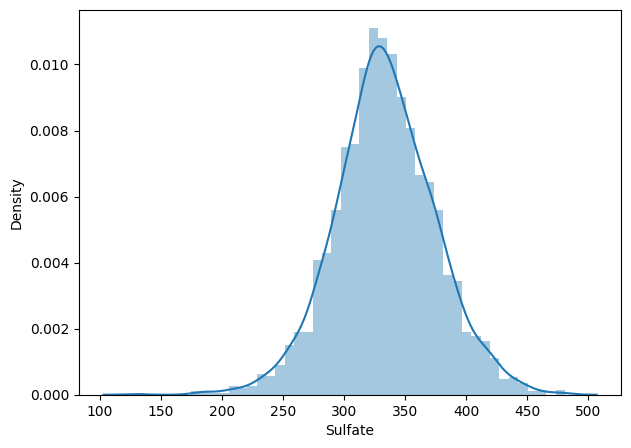

In [ ]:
plt.rcParams['figure.figsize'] = [7,5]
sns.distplot(df['Sulfate'])

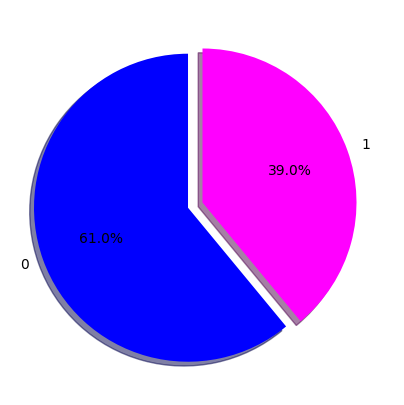

In [ ]:
labels =df['Potability'].value_counts(sort = True).index
sizes = df['Potability'].value_counts(sort = True)

colors = ["blue","magenta"]
explode = (0.1,0)

plt.figure(figsize=(5,5)) #Plot size
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.show()

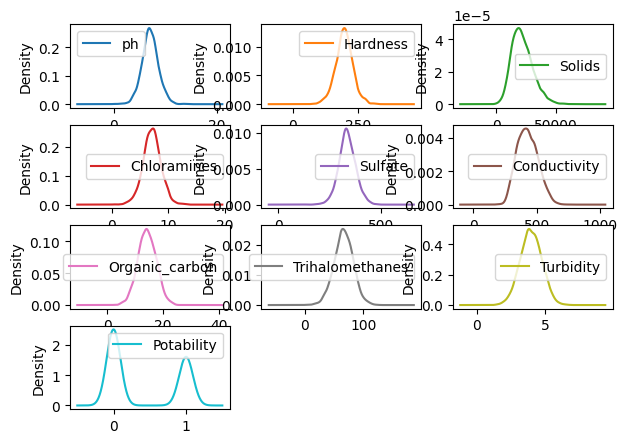

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,3),sharex=False)
pyplot.show()

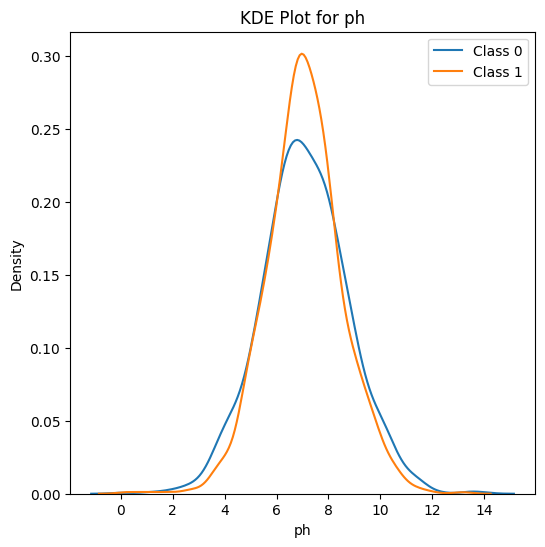

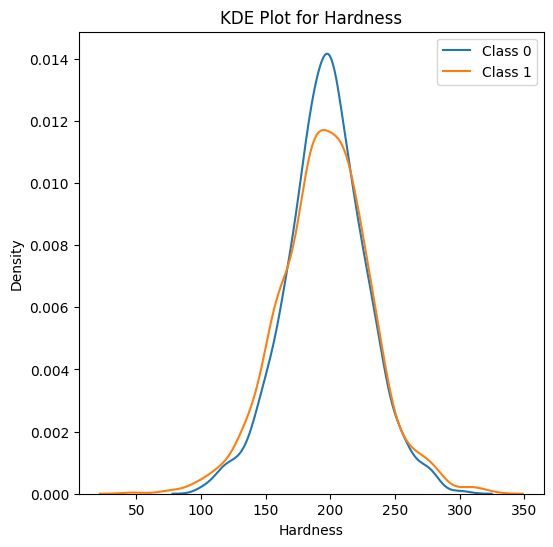

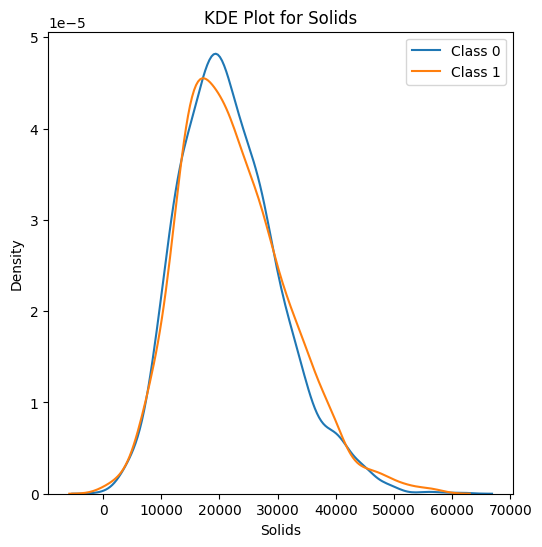

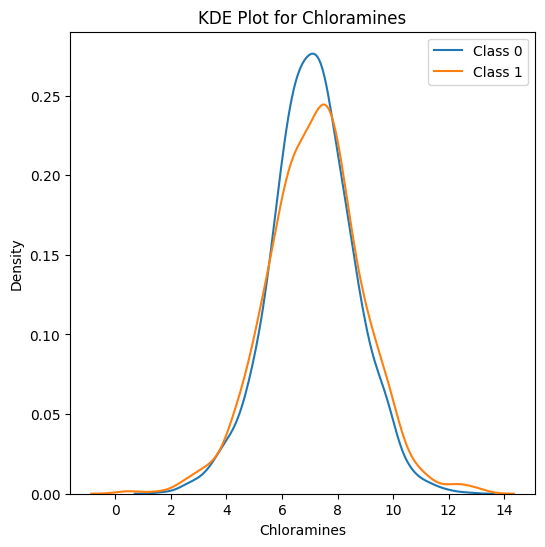

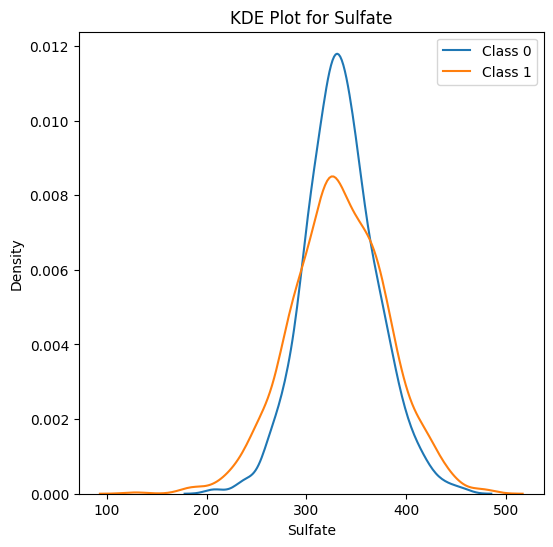

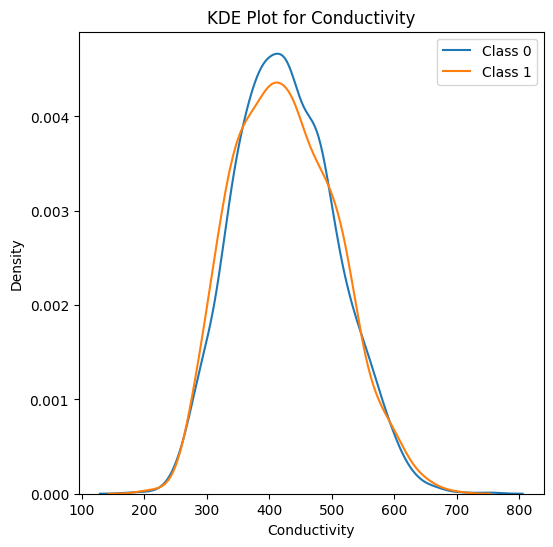

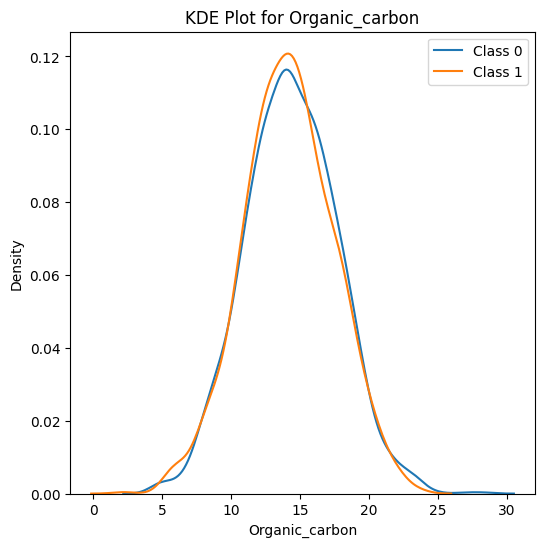

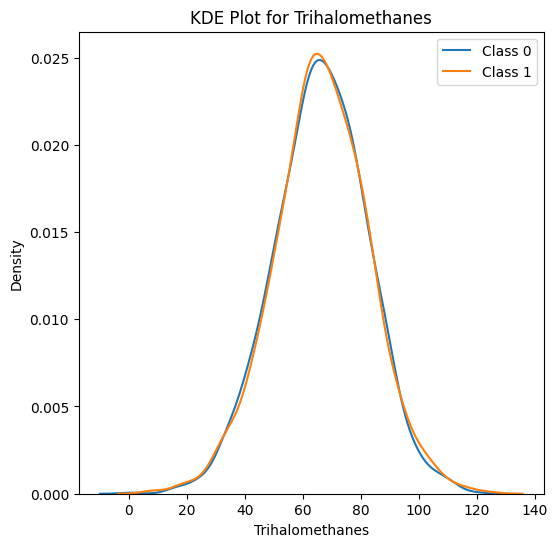

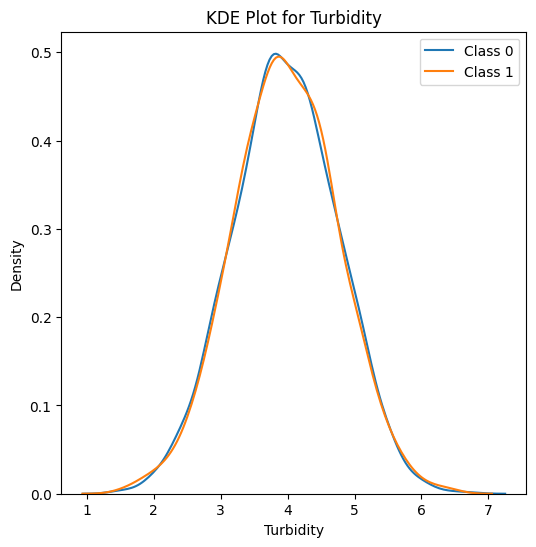

In [ ]:
#DENSITY PLOT

class_list = y.unique()
for col in X.columns:
    fig, ax = plt.subplots(figsize=(6, 6))
    for i, c in enumerate(class_list):
        sns.kdeplot(data=df[df["Potability"] == c][col], label=f"Class {c}")

    plt.title(f"KDE Plot for {col}")
    plt.legend()
    plt.show()

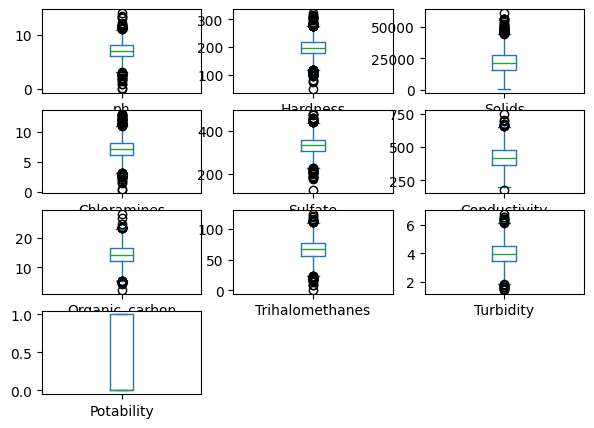

In [ ]:
# Box and Whisker Plots
df.plot(kind='box', subplots=True,layout=(4,3),sharex=False, sharey=False)
pyplot.show()

<Axes: >

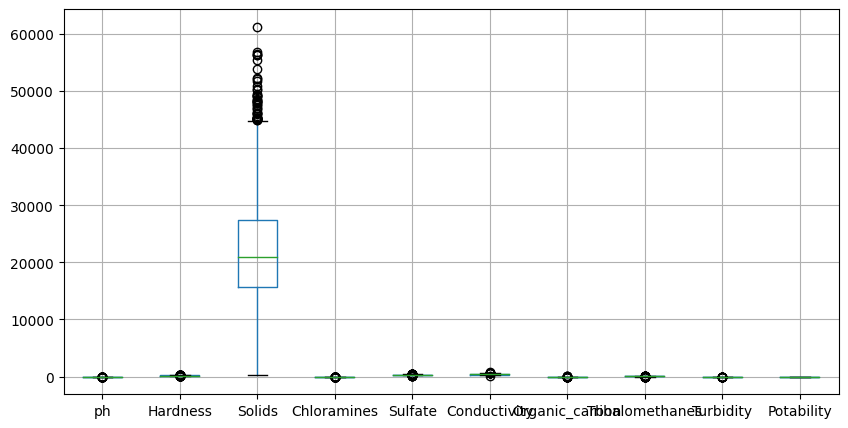

In [ ]:
df.boxplot(figsize=(10,5))

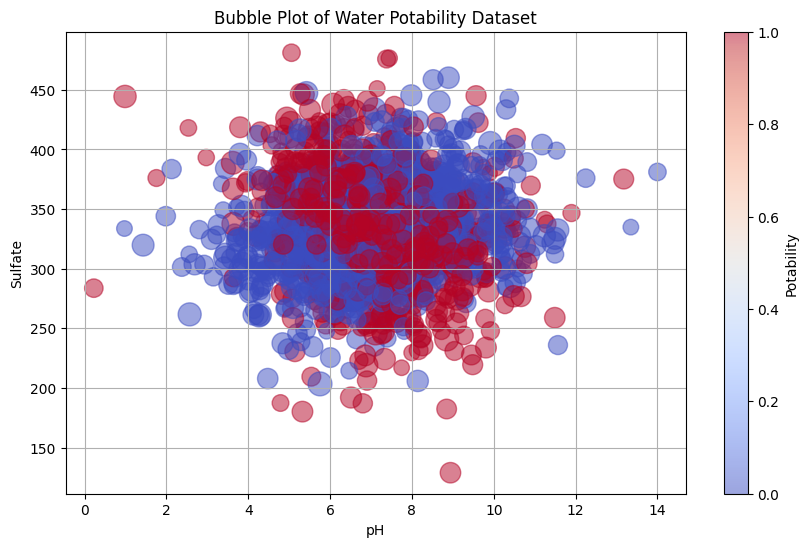

In [ ]:
# Define features and colors
x = df['ph']
y = df['Sulfate']
bubble_size = df['Turbidity'] * 50
colors = df['Potability']  # Use 'Potability' column for different bubble colors

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=bubble_size, c=colors, cmap='coolwarm', alpha=0.5)
plt.xlabel('pH')
plt.ylabel('Sulfate')
plt.title('Bubble Plot of Water Potability Dataset')
plt.colorbar(label='Potability')
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df, x='ph', y='Sulfate', size='Turbidity', color='Hardness', hover_data=['Potability'])
fig.show()

In [ ]:
sns.scatterplot(x=df['ph'], y=df['Sulfate'])
plt.show()

In [ ]:
sns.pairplot(X)

In [ ]:
# if reduce the dimensionality of a dataset is needed
# exploring the data
sns.heatmap(df.corr(),annot=True,cmap='gist_rainbow')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

# EXPT 3

In [ ]:
import pandas as pd
df = pd.read_csv('water_potability.csv')
df = df.dropna()

import pandas as pd
df = pd.read_csv('water_potability.csv')
# data['age'].fillna(data['age'].mean(), inplace=True)

from sklearn.preprocessing import RobustScaler
import pandas as pd
# Load your data
df = pd.read_csv('water_potability.csv')
# Identify numeric columns for scaling
numeric_columns = df.select_dtypes(include=['number']).columns

# Select the features (X) you want to scale
X = df[numeric_columns]

# Instantiate the RobustScaler
scaler = RobustScaler()

# Fit and transform the selected features
X_scaled = scaler.fit_transform(X)

# Replace the original numeric features with the scaled features in the DataFrame
df[numeric_columns] = X_scaled

# Now 'data' contains the scaled values in numeric columns

import pandas as pd
df = pd.read_csv('water_potability.csv')
df = pd.get_dummies(df, columns=['Hardness'])

import pandas as pd
df = pd.read_csv('water_potability.csv')
df = df.drop_duplicates()

import pandas as pd
from sklearn.preprocessing import StandardScaler

# read the data into a pandas dataframe
df = pd.read_csv('water_potability.csv')

# create a feature matrix and target vector
X = df.drop(["ph", "Solids"], axis=1)
y = df["Hardness"]

# scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[["Hardness", "Potability"]])

# concatenate the scaled features with the categorical features
gender_dummies = pd.get_dummies(X["Hardness"], prefix="Hardness")
X_processed = pd.concat(
    [gender_dummies, pd.DataFrame(X_scaled, columns=["Hardness", "Potability"])],
    axis=1,
)
print(X_processed)


# EXPT 04

In [ ]:
import numpy as np
from scipy.stats import ttest_ind, norm

# Generate sample data
np.random.seed(42)  # for reproducibility
Hardness = np.random.normal(loc=80, scale=10, size=30)
Solids = np.random.normal(loc=85, scale=12, size=30)

# Perform two-sample t-test
t_stat, p_value = ttest_ind(Hardness, Solids)

# Print results
print("Two-Sample T-Test:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Perform z-test (assuming population standard deviations are known)
# Here, we'll just use sample standard deviations as estimates
mean_a, mean_b = np.mean(Hardness), np.mean(Solids)
std_a, std_b = np.std(Hardness, ddof=1), np.std(Solids, ddof=1)
n_a, n_b = len(Hardness), len(Solids)

# Calculate z-score
z_score = (mean_a - mean_b) / np.sqrt((std_a**2 / n_a) + (std_b**2 / n_b))

# Calculate p-value using normal distribution
p_value_z = 2 * (1 - norm.cdf(np.abs(z_score)))

# Print results
print("\nZ-Test:")
print("Z-score:", z_score)
print("P-value:", p_value_z)

In [ ]:
'''
import numpy as np
import pandas as pd
from scipy import stats

file_path_iris = '/content/drive/MyDrive/datasets/Iris.csv'

iris_df = pd.read_csv(file_path_iris)

# For example, let's compare Sepal Length (cm) of two species: 'setosa' and 'versicolor'
sample_setosa = iris_df[iris_df['Species'] == 'Iris_setosa']['SepalLengthCm']
sample_versicolor = iris_df[iris_df['Species'] == 'Iris-versicolor']['SepalWidthCm']

# Step 5: Perform t-test (two-sample)
t_statistic, p_value = stats.ttest_ind(sample_setosa, sample_versicolor)

# Step 6: Set significance level (alpha)
alpha = 0.05

# Step 7: Interpret results
print("T-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

'''

In [ ]:
'''
import pandas as pd
from scipy import stats

# Step 1: Load the dataset
data = pd.read_csv("/content/drive/MyDrive/datasets/salary_dataset.csv")

# Step 2: Extract the salary column
salary = data["Salary"]

# Step 3: Define the null hypothesis (H0) and alternative hypothesis (H1)
# H0: The mean salary is equal to a specified value (population mean)
# H1: The mean salary is not equal to the specified value

# Step 4: Set the specified value for population mean (mu)
mu = 50000  # For example, assuming the population mean is $50,000

# Step 5: Calculate the sample mean and standard deviation
sample_mean = salary.mean()
sample_std = salary.std()

# Step 6: Calculate the Z-score
Z = (sample_mean - mu) / (sample_std / (len(salary) ** 0.5))

# Step 7: Set the significance level (alpha)
alpha = 0.05  # For example, alpha = 0.05 (5% significance level)

# Step 8: Perform the Z-test
p_value = stats.norm.cdf(Z) * 2  # Two-tailed test

# Step 9: Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis (H0)")
    print("Mean salary is significantly different from $50,000.")
else:
    print("Fail to reject the null hypothesis (H0)")
    print("Mean salary is not significantly different from $50,000.")

print("Z-score:", Z)
print("p-value:", p_value)
'''

# EXPT 5

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#creating a mobel object
model_lr=LogisticRegression()

#training model
model_lr.fit(x_train,y_train)

#making prediction
pred_lr = model_lr.predict(x_test)

#accuracy score
accuracy_score_lr = accuracy_score(y_test,pred_lr)
accuracy_score_lr

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_lr)
cm


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, pred_lr),annot=True,lw =1,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,pred_lr)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Drop rows with missing values
df.dropna(inplace=True)

# Split data into features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("X shape:", X.shape)
print("y shape:", y.shape)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your full datasets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Initialize and fit the logistic regression model
logreg_model = LogisticRegression(solver='lbfgs', max_iter=4000)
logreg_model.fit(x_train, y_train)

# Predictions
y_pre = logreg_model.predict(x_train)
y_pred = logreg_model.predict(x_test)
y_pred1 = logreg_model.predict_proba(x_test)

# Print performance metrics
print("Training Accuracy_score: {}".format(accuracy_score(y_train, y_pre)))
print("Testing Accuracy_score: {}".format(accuracy_score(y_test, y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test, y_pred1[:,1])))
print("CV_score: {}".format(cross_val_score(logreg_model, X, y, cv=10, scoring='accuracy').mean()))


In [ ]:
y_true = np.array([1, 2, 3, 4, 5])
y_pred = np.array([1.5, 2.5, 2.8, 4.2, 4.9])

y = df['Potability']
x = df[['Potability']]


# Calculate the MAE

from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_true, y_pred)
print("R2 score:", r2)

In [ ]:
import statsmodels.api as sm

#define response variable
y = df['Potability']

#define predictor variable
x = df[['Potability']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#calculate sse
sse = np.sum((model.fittedvalues - df.Potability)**2)
print(sse)



In [ ]:
#define response variable
y = df['Potability']

#define predictor variable
x = df[['Potability']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#display adjusted R-squared
print(model.rsquared_adj)

# EXPT 06

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
data = pd.read_csv('water_potability.csv')
# Check the initial data distribution
print("Class distribution before SMOTE:")
print(data['Potability'].value_counts())
# Separate features and target
X = data.drop('Potability', axis=1)
y = data['Potability']
# Handling missing values (optional, depends on the dataset)
# For demonstration, we will fill missing values with the mean of each column
X = X.fillna(X.mean())
# Initialize SMOTE
smote = SMOTE(random_state=42)
# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)
# Checking class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())
# Convert the resampled data back to a DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Potability'] = y_resampled
print("\nResampled dataset sample:")
print(resampled_data.head())


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
# Read the dataset
data = pd.read_csv('water_potability.csv')
# Handling missing values
data.fillna(data.mean(), inplace=True)


plt.figure(figsize=(4, 2))
sns.countplot(x='Potability', data=data)
plt.title('Class Distribution Before SMOTE')
plt.show()
# Print initial class counts
print("Initial class distribution:")
print(data['Potability'].value_counts())


# Separate features and target
X = data.drop('Potability', axis=1)
y = data['Potability']
# Initialize and apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Visualize the new class distribution
plt.figure(figsize=(4, 2))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()
# Print resampled class counts
print("Resampled class distribution:")
print(pd.Series(y_resampled).value_counts())


# Example: Visualize the distribution of a feature
feature = 'ph'  # Replace with any feature from the dataset
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
sns.histplot(data[feature], kde=True, color='blue', bins=20)
plt.title('Distribution of {} Before SMOTE'.format(feature))
plt.subplot(1, 2, 2)
sns.histplot(X_resampled[feature], kde=True, color='green', bins=20)
plt.title('Distribution of {} After SMOTE'.format(feature))
plt.show()





# EXPT 7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# Generate sample data
X, _ = make_blobs(n_samples=200, centers=2, cluster_std=0.60, random_state=42)
X = np.concatenate([X, np.random.uniform(low=-10, high=10, size=(20, 2))])  # Add some outliers
# Scale the data
X = StandardScaler().fit_transform(X)
# Plot the data
plt.scatter(X[:, 0], X[:, 1], color='blue', s=50, edgecolor='k')
plt.title('Data Distribution with Outliers')
plt.xlabel('Sulphate')
plt.ylabel('ph')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Generate synthetic data with outliers
X, _ = make_blobs(n_samples=200, centers=2, cluster_std=0.60, random_state=42)
X = np.concatenate([X, np.random.uniform(low=-10, high=10, size=(20, 2))])  # Add some outliers
X = StandardScaler().fit_transform(X)
# NearestNeighbors for outlier detection
nn = NearestNeighbors(n_neighbors=5)
nn.fit(X)
distances, indices = nn.kneighbors(X)
# Determine an outlier threshold
threshold = np.mean(distances[:, -1]) + 2 * np.std(distances[:, -1])
# Identify outliers
outliers = distances[:, -1] > threshold
# Plot the results
plt.scatter(X[:, 0], X[:, 1], color='blue', s=50, edgecolor='k', label='Data Points')
plt.scatter(X[outliers, 0], X[outliers, 1], color='red', s=50, edgecolor='k', label='Outliers')
plt.title('Outlier Detection with Nearest Neighbors')
plt.xlabel('Sulphate')
plt.ylabel('ph')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

# Local Outlier Factor for detecting outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)
# Mask for outliers
outliers_lof = y_pred == -1
# Plot the results
plt.scatter(X[:, 0], X[:, 1], color='blue', s=50, edgecolor='k', label='Data Points')
plt.scatter(X[outliers_lof, 0], X[outliers_lof, 1], color='red', s=50, edgecolor='k', label='Outliers')
plt.title('Outlier Detection with Local Outlier Factor')
plt.xlabel('Sulphate')
plt.ylabel('ph')
plt.legend()
plt.grid(True)
plt.show()

# EXPT 08

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Generate some data
np.random.seed(0)
data = np.random.randn(120) + 10 + np.arange(120)/10  # increasing trend with noise
# Convert to pandas DataFrame
dates = pd.date_range(start='2010-01-01', periods=len(data), freq='M')
ts = pd.DataFrame(data, columns=['Sales'], index=dates)


In [ ]:
# Moving Average
ts['MA_12'] = ts['Sales'].rolling(window=12).mean()

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(ts['Sales'], label='Original')
plt.plot(ts['MA_12'], label='12-Months Moving Average', color='red')
plt.title('Moving Average Smoothing')
plt.legend()
plt.show()


In [ ]:
# ARIMA Model
model = ARIMA(ts['Sales'], order=(1, 1, 1))
model_fit = model.fit()
# Forecast
forecast = model_fit.forecast(steps=12)
# Plotting
plt.figure(figsize=(6, 4))
plt.plot(ts['Sales'], label='Original')
plt.plot(ts.index[-12:], forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


In [ ]:
# Linear Regression
X = np.arange(len(ts)).reshape(-1, 1)  # Time as predictor
y = ts['Sales'].values
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Create and fit the model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
# Predictions
y_pred = model_lr.predict(X_test)
# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression Forecast')
plt.legend()
plt.show()
# Error
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


In [ ]:
#karl pearson correlation coefficient

import numpy as np
# Example datasets
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 11])
# Number of observations
n = len(x)

# Sum of products
sum_xy = np.sum(x * y)

# Sum of x-values and y-values
sum_x = np.sum(x)
sum_y = np.sum(y)

# Sum of squares of x-values and y-values
sum_x2 = np.sum(x**2)
sum_y2 = np.sum(y**2)

# Pearson correlation coefficient calculation
numerator = n * sum_xy - sum_x * sum_y
denominator = np.sqrt((n * sum_x2 - sum_x**2) * (n * sum_y2 - sum_y**2))

# Prevent division by zero error
if denominator == 0:
    r = 0
else:
    r = numerator / denominator

print("Karl Pearson correlation coefficient:", r)


In [ ]:
import numpy as np

# Generate a random array of 100 elements
data = np.random.normal(loc=0, scale=1, size=100)  # Normally distributed data

# Calculate mean and median
mean_data = np.mean(data)
median_data = np.median(data)

# Calculate standard deviation
std_dev = np.std(data)

# Calculate Karl Pearson Skewness
if std_dev == 0:
    skewness = 0
else:
    skewness = 3 * (mean_data - median_data) / std_dev

print("Mean:", mean_data)
print("Median:", median_data)
print("Standard Deviation:", std_dev)
print("Karl Pearson Skewness:", skewness)
